<a href="https://colab.research.google.com/github/WoobeenJeong/bioinfo1_jwb/blob/main/Project_006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1) Data mounting**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2) Environment setting**

In [ ]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

In [ ]:
!conda install -y bedtools bioawk samtools

**3) Data loading & check**

**4) Background setting**

In [2]:
%cd /content/drive/MyDrive/binfo1-work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter

/content/drive/MyDrive/binfo1-work


In [ ]:
!gzip -d gencode.vM32.annotation.gtf.gz

In [ ]:
!grep 'chr9' gencode.vM32.annotation.gtf > gencode.vM32.chr9.gtf

In [ ]:
f50pileup = pd.read_csv('f50pileup.csv')

In [ ]:
f50pileup.head()

,Unnamed: 0,chrom,pos,ref,count,basereads,quals,matches,base_count
0,21616,chr9,3359542,N,51,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,HDEIHIIGIIIHHIIGAIIIGIBGIHBFGIHE?GIGIHGGHHIBII...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,51
1,21617,chr9,3359543,N,51,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,IGEIHFG@IIIHHHIGFHIIEIBHIH;GGIHH=GIEIHIGHHIGII...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,51
2,21618,chr9,3359544,N,51,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,IHBIHIIDHGIGHIIIDIIIDH0HH?DEHFHBBGIGIHIGHHDAII...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,51
3,21619,chr9,3359545,N,51,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,IH8IHIIEIGIGHIIFFIIIGI=HIHDGGIHI;GHIIGHGHHI4DI...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,51
4,21620,chr9,3359546,N,51,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,IHEIHHIEIGGDHIIDHIIIGI7HIH>GHIHI<GIGIFIGDHFCII...,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,51


In [ ]:
subpup = pup[(pup['shannon'] > 0.2) & (pup['pos'] > 1.0e8)]

In [ ]:
subpup

In [ ]:
target = subpup[['chrom','pos']]
target['start'] = target['pos'] -7
target['stop'] = target['pos'] +6
target['shannon'] = subpup[['shannon']]
target = target.drop('pos', axis=1)

In [ ]:
target.to_csv("target.bed",header=None, index=False, sep='\t')

120788886	- 123291148	서열 확인  
123290888	- 123291148	서열 확인



In [ ]:
!grep "ENSMUSG00000035202.9" gencode.vM32.pc_transcripts.fa

>ENSMUST00000038863.9|ENSMUSG00000035202.9|OTTMUSG00000062845.1|OTTMUST00000153045.1|Lars2-201|Lars2|3894|UTR5:1-199|CDS:200-2908|UTR3:2909-3894|
>ENSMUST00000217116.2|ENSMUSG00000035202.9|OTTMUSG00000062845.1|OTTMUST00000153048.1|Lars2-209|Lars2|3756|UTR5:1-172|CDS:173-1660|UTR3:1661-3756|
>ENSMUST00000216843.2|ENSMUSG00000035202.9|OTTMUSG00000062845.1|OTTMUST00000153049.1|Lars2-208|Lars2|720|UTR5:1-455|CDS:456-720|
>ENSMUST00000215464.2|ENSMUSG00000035202.9|OTTMUSG00000062845.1|OTTMUST00000153050.1|Lars2-206|Lars2|554|CDS:1-364|UTR3:365-554|


In [ ]:
!awk -F'\t' '{if ($3 == "gene" && $4 <= 123290888 && $5 >= 123291148 ) print}' gencode.vM32.chr9.gtf

chr9	HAVANA	gene	123195992	123291731	.	+	.	gene_id "ENSMUSG00000035202.9"; gene_type "protein_coding"; gene_name "Lars2"; level 2; mgi_id "MGI:2142973"; havana_gene "OTTMUSG00000062845.1";


In [ ]:
!wget https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M32/GRCm39.genome.fa.gz

In [ ]:
!gzip -d GRCm39.genome.fa.gz

In [ ]:
!bedtools getfasta -fi GRCm39.genome.fa -bed target_mirlet7g.bed -fo target_mirlet7g.fa

In [ ]:
!bedtools getfasta -fi GRCm39.genome.fa -bed target_mirlet7g3.bed -fo target_mirlet7g3.fa

In [ ]:
!head target_mirlet7g.fa

>chr9:120780449-120780462
ACAAATGATGTAG
>chr9:120780550-120780563
AGCGCTGGTGAAA
>chr9:120780563-120780576
ATGCTTGGGTAAG
>chr9:120780781-120780794
ACAAACGTGAAAT
>chr9:120781981-120781994
ACTTATGAGAAGC


In [ ]:
!head target_mirlet7g3.fa

>chr9:106066861-106066892
TATGACCCTTGATCTGTTTGTATTTGAACAC
>chr9:106066862-106066893
ATGACCCTTGATCTGTTTGTATTTGAACACT
>chr9:106066863-106066894
TGACCCTTGATCTGTTTGTATTTGAACACTG
>chr9:106066864-106066895
GACCCTTGATCTGTTTGTATTTGAACACTGT
>chr9:106066865-106066896
ACCCTTGATCTGTTTGTATTTGAACACTGTG


In [ ]:
!grep 'ACAAATGATGTAG' target_mirlet7g.fa

ACAAATGATGTAG


In [ ]:
!grep '[A-Z][A-Z][A-Z][A-Z][A-Z][A-Z]G[A-Z][A-Z][A-Z][A-Z][A-Z][A-Z]' target_mirlet7g.fa > G_target_mirlet7g.fa

In [ ]:
!grep '[A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z]AG[A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z]' target_mirlet7g3.fa > G_target_mirlet7g3.fa

In [ ]:
!head G_target_mirlet7g3.fa

CATCTAGATTATCAAGGGAGAGGGAACCTTG
TAGATTATCAAGGGAGAGGGAACCTTGCAGC
GATTATCAAGGGAGAGGGAACCTTGCAGCCA
AGAGGGAACCTTGCAGCCAAGAATGACTCTG
GAACCTTGCAGCCAAGAATGACTCTGTGGAT
ATGACTCTGTGGATAGTGTGTGCCACAAGTG
TAGTGTGTGCCACAAGTGTTATTCTTCTCTG
GTCACAGGGTAATAAGAAAGAGGGAGAAAGC
CAGGGTAATAAGAAAGAGGGAGAAAGCAGAG
GGGTAATAAGAAAGAGGGAGAAAGCAGAGAT


재시작 시, 여기서부터 

In [ ]:
!head G_target_mirlet7g.fa

ACAAATGATGTAG
AGCGCTGGTGAAA
ATGCTTGGGTAAG
ACAAACGTGAAAT
ACTTATGAGAAGC
CTGCAGGGGTCCT
CTCCAGGAATGAA
TCAGTCGAGCTGA
GTTCTAGTGAACC
AGAACCGAGTAAT


In [ ]:
with open('G_target_mirlet7g.fa', 'r') as file:
    sequences = file.readlines()

sequences = [seq.strip() for seq in sequences]

counts = { 'A': [], 'T': [], 'G': [], 'C': [] }

for position in range(0, 13):
    nucleotide_counts = { 'A': 0, 'T': 0, 'G': 0, 'C': 0 }
    for sequence in sequences:
        base = sequence[position]
        nucleotide_counts[base] += 1
    for nucleotide, count in nucleotide_counts.items():
        counts[nucleotide].append(count)
df = pd.DataFrame(counts)
df.insert(0, 'pos', range(-6,7))
df.rename(columns={'T': 'U'}, inplace=True)
df

,pos,A,U,G,C
0,-6,8,3,1,2
1,-5,3,4,2,5
2,-4,6,2,4,2
3,-3,4,1,4,5
4,-2,7,3,0,4
5,-1,3,5,3,3
6,0,0,0,14,0
7,1,6,3,4,1
8,2,1,4,9,0
9,3,4,4,5,1


In [ ]:
sum_row = df.sum(axis=1)
percentages = df.iloc[:, 1:].div(sum_row, axis=0)
result = pd.concat([df['pos'], percentages], axis=1)
result = result.set_index('pos')
result

,A,U,G,C
pos,,,,
-6,1.000000,0.375000,0.125000,0.250000
-5,0.333333,0.444444,0.222222,0.555556
-4,0.600000,0.200000,0.400000,0.200000
-3,0.363636,0.090909,0.363636,0.454545
-2,0.583333,0.250000,0.000000,0.333333
-1,0.230769,0.384615,0.230769,0.230769
0,0.000000,0.000000,1.000000,0.000000
1,0.400000,0.200000,0.266667,0.066667
2,0.062500,0.250000,0.562500,0.000000


In [ ]:
sum_row = df.iloc[:, 1:].sum(axis=1)
percentages = df.iloc[:, 1:].div(sum_row, axis=0)
normalize = pd.concat([df['pos'], percentages], axis=1)

In [ ]:
normalize = normalize.set_index('pos')
normalize

,A,U,G,C
pos,,,,
-6,0.571429,0.214286,0.071429,0.142857
-5,0.214286,0.285714,0.142857,0.357143
-4,0.428571,0.142857,0.285714,0.142857
-3,0.285714,0.071429,0.285714,0.357143
-2,0.500000,0.214286,0.000000,0.285714
-1,0.214286,0.357143,0.214286,0.214286
0,0.000000,0.000000,1.000000,0.000000
1,0.428571,0.214286,0.285714,0.071429
2,0.071429,0.285714,0.642857,0.000000


In [ ]:
!pip install logomaker
import logomaker

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.ion()

import logomaker as lm

이건 logomaker의 예시 파일 

In [ ]:
crp_df = -lm.get_example_matrix('crp_energy_matrix')
crp_df.head()

Description of example matrix "crp_energy_matrix":
# 
# CRP energy matrix from Kinney et al. (2010).
# Matrix values are in units of kcal/mol.
# 
# References
# 
# Kinney JB et al. (2010) Using deep sequencing to characterize the
# biophysical mechanism of a transcriptional regulatory sequence.
# Proc Natl Acad Sci USA. 107(20):9158–63.
# 



,A,C,G,T
pos,,,,
0,0.183642,-0.155864,-0.094136,0.066358
1,0.290123,-0.277778,-0.111111,0.098765
2,0.276235,-0.316358,-0.168210,0.208333
3,0.226852,-0.285494,-0.297840,0.356481
4,0.060185,-0.143519,-0.057099,0.140432


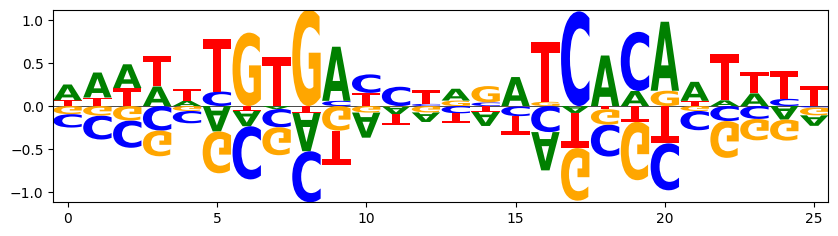

In [ ]:
plt.rcParams['font.family'] = 'sans-serif'
logo = lm.Logo(crp_df, font_name = 'sans-serif')

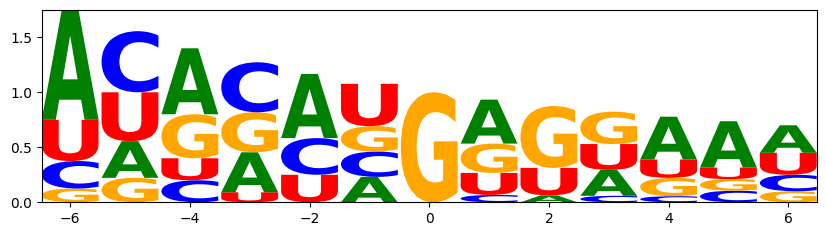

In [ ]:
plt.rcParams['font.family'] = 'sans-serif'
logo = lm.Logo(result, font_name = 'sans-serif')

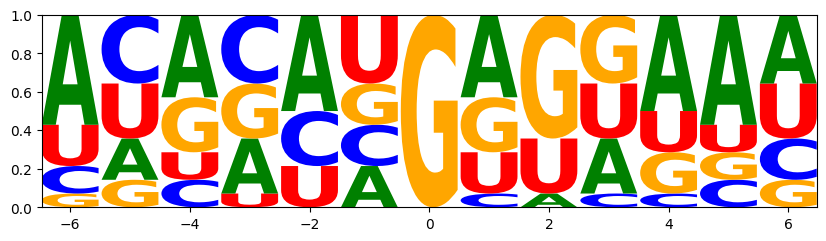

In [ ]:
plt.rcParams['font.family'] = 'sans-serif'
logo = lm.Logo(normalize, font_name = 'sans-serif')

In [ ]:
df2=df
df2 = df.set_index('pos')

In [ ]:
info_mat = lm.transform_matrix(df2, 
                                      from_type='counts', 
                                      to_type='information')

In [ ]:
info_mat

,A,C,G,U
pos,,,,
-6,0.117377,0.039126,0.026084,0.052167
-5,0.010070,0.015105,0.007552,0.012587
-4,0.036993,0.015854,0.026424,0.015854
-3,0.025778,0.030933,0.025778,0.010311
-2,0.112370,0.070231,0.014046,0.056185
-1,0.005569,0.005569,0.005569,0.008354
0,0.060323,0.060323,0.904848,0.060323
1,0.047584,0.013596,0.033989,0.027191
2,0.047965,0.023982,0.239823,0.119912


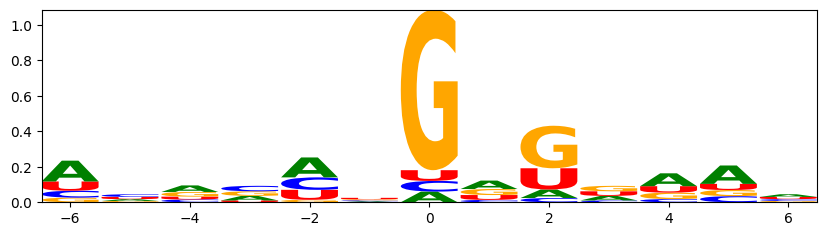

In [ ]:
lm.Logo(info_mat)

In [ ]:
!bedtools getfasta -fi GRCm39.genome.fa -bed target_mirlet7g2.bed -fo target_mirlet7g2.fa

In [ ]:
!grep '[A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z]G[A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z][A-Z]' target_mirlet7g2.fa > G_target_mirlet7g2.fa

In [ ]:
!head G_target_mirlet7g2.fa

AGAATACAAATGATGTAGAGACA
ATCCCAGCGCTGGTGAAAATGCT
TGAAAATGCTTGGGTAAGAGAAT
ACAAAACAAACGTGAAATTCTTG
CCTACACTTATGAGAAGCTTCTG
AGTAGCTGCAGGGGTCCTCTGTG
CTCCACTCCAGGAATGAAGGCGT
GGCTTTCAGTCGAGCTGACCAGT
GTTATGTTCTAGTGAACCTGCTA
TTCTAAGAACCGAGTAATGGTGT


In [ ]:
with open('G_target_mirlet7g2.fa', 'r') as file:
    sequences = file.readlines()

sequences = [seq.strip() for seq in sequences]

counts = { 'A': [], 'T': [], 'G': [], 'C': [] }

for position in range(0, 23):
    nucleotide_counts = { 'A': 0, 'T': 0, 'G': 0, 'C': 0 }
    for sequence in sequences:
        base = sequence[position]
        nucleotide_counts[base] += 1
    for nucleotide, count in nucleotide_counts.items():
        counts[nucleotide].append(count)
df = pd.DataFrame(counts)
df.insert(0, 'pos', range(-11,12))
df.rename(columns={'T': 'U'}, inplace=True)
df

In [ ]:
sum_row = df.sum(axis=1)
percentages = df.iloc[:, 1:].div(sum_row, axis=0)
result = pd.concat([df['pos'], percentages], axis=1)
result = result.set_index('pos')

In [ ]:
sum_row = df.iloc[:, 1:].sum(axis=1)
percentages = df.iloc[:, 1:].div(sum_row, axis=0)
normalize = pd.concat([df['pos'], percentages], axis=1)
normalize = normalize.set_index('pos')

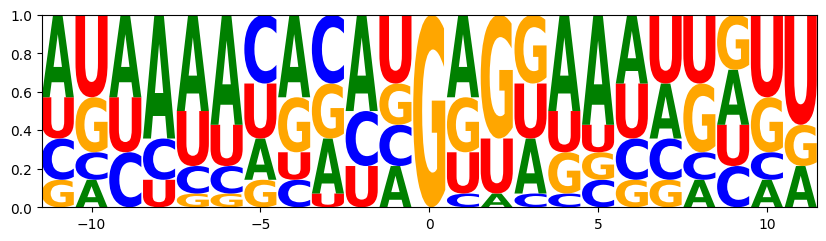

In [ ]:
plt.rcParams['font.family'] = 'sans-serif'
logo = lm.Logo(normalize, font_name = 'sans-serif')

In [ ]:
pup = pd.read_csv('pup.csv', usecols=['pos', 'base_count', 'countA', 'countT', 'countG', 'countC', 'shannon'])
pup.head()

,pos,base_count,countA,countT,countG,countC,shannon
0,120779272,52,1.000000,0.0,0.000000,0.0,-0.000000
1,120779273,52,0.000000,0.0,0.000000,1.0,-0.000000
2,120779276,52,0.000000,0.0,0.000000,1.0,-0.000000
3,120779277,52,0.000000,1.0,0.000000,0.0,-0.000000
4,120779278,52,0.173077,0.0,0.826923,0.0,0.664695


In [ ]:
pup = pd.read_csv('pup.csv')
max_columns = pup[['countA', 'countT', 'countG', 'countC']].idxmax(axis=1)
column_letters = max_columns.str[-1]
result = ''.join(column_letters)
result

'ACCTGCGTGGAACTAAGCTGACCTGATGGAGTTGGACATGGCCATGGAGCCGGACAGAAAAGCTGCTGTCAGCCACTGGCAGCAGCAGTCTCCTTCCCTGAGTGGCAAGGGCAACCCTGAGGAAGAAGATGTTGACACCTCCCAAGTCCTTTATGAATGGGAGCAAGGCTTTTCCCAGTCCTTCACGCAAGAGCAAGTAGCTGATATTGACGGGCAGTATGCAATGACTAGGGCTCAGAGGGTCCGAGCTGCCATGTTCCCTGAGACGCTAGAATGCAGAATACAAATGATGTAGAGACAGCTCGTTGTACTGCTGGGACTCTGCACAACCTAAGTCTGGTGGCATCCCAGCGCTGGTGAAAATGCTTGGGTCACCAGTGGATTCTGAAACGTGAAATTCTTGGCTATTACAACAGACTGCCTTCAGATCTT'

In [ ]:
substring = 'AAG*G'
start_positions = []

for i in range(len(result) - len(substring) + 1):
    if result[i:i+len(substring)].startswith('AAG') and result[i:i+len(substring)].endswith('G'):
        start_positions.append(i)

if start_positions:
    print("Substring '", substring, "' found at starting positions:", start_positions)
else:
    print("Substring '", substring, "' not found.")

Substring ' AAG*G ' found at starting positions: [106, 188]


In [ ]:
pup.loc[106:110]

,Unnamed: 0,chrom,pos,ref,count,basereads,quals,matches,base_count,countA,countT,countG,countC,shannon
106,17514758,chr9,120779719,N,121,>>>>AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,GIDDG@<GGGIH=EIGG;GEIGBGHGGIHIIIDIGGGHDGGIHIEI...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,117,1.000000,0.0,0.000000,0.0,-0.000000
107,17514759,chr9,120779720,N,121,>>>>AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,GIDDGD?IIDHB?8IBE9DBIG=<HGGIHGIHHIHHBBDIHIIIGH...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,117,1.000000,0.0,0.000000,0.0,-0.000000
108,17514760,chr9,120779721,N,119,>>>>GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,GIDD>G=HEDIIBEIBDGBG>CGHGGIHGIIHIHHBH<IHHGHDIF...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,115,0.000000,0.0,1.000000,0.0,-0.000000
109,17514761,chr9,120779722,N,121,>>>>GGGGGGGGGGGGGGGGGGGGGGGAGGGGGGGGGAGGGGGGAA...,GIDD>ECDIFIGBHIGGE@BHGB>HGEIHIIGHIHHFHBGGHDIGH...,GGGGGGGGGGGGGGGGGGGGGGGAGGGGGGGGGAGGGGGGAAGGGA...,117,0.042735,0.0,0.957265,0.0,0.254695
110,17514762,chr9,120779723,N,121,>>>>GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,GIDDEFGIDDIHGHI@@ED3H?1EDGBIHBIHDIFHAHBIDBHHGI...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,117,0.000000,0.0,1.000000,0.0,-0.000000


In [ ]:
pup.loc[93:122]

In [ ]:
target = pup.loc[93:122, ['countA', 'countT', 'countG', 'countC']].rename(columns={'countA': 'A', 'countT': 'U', 'countG': 'G', 'countC': 'C'})
target.insert(0, 'pos', range(-15,15))
target

In [ ]:
tarsum = target.sum(axis=1)
tarper = target.iloc[:, 1:].div(sum_row, axis=0)
tarsum = target.iloc[:, 1:].sum(axis=1)
tarper = target.iloc[:, 1:].div(tarsum, axis=0)
tarnorm = pd.concat([target['pos'], tarper], axis=1)
tarnorm = tarnorm.set_index('pos')

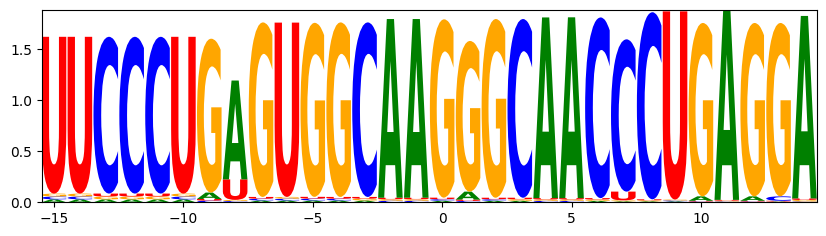

In [ ]:
target = target.set_index('pos')
plt.rcParams['font.family'] = 'sans-serif'
logo = lm.Logo(target, font_name = 'sans-serif')

In [ ]:
with open('G_target_mirlet7g3.fa', 'r') as file:
    sequences = file.readlines()

sequences = [seq.strip() for seq in sequences]

counts = { 'A': [], 'T': [], 'G': [], 'C': [] }

for position in range(0, 31):
    nucleotide_counts = { 'A': 0, 'T': 0, 'G': 0, 'C': 0 }
    for sequence in sequences:
        base = sequence[position]
        nucleotide_counts[base] += 1
    for nucleotide, count in nucleotide_counts.items():
        counts[nucleotide].append(count)
df = pd.DataFrame(counts)
df.rename(columns={'T': 'U'}, inplace=True)
df

In [ ]:
sum_row = df.sum(axis=1)
percentages = df.iloc[:, 0:].div(sum_row, axis=0)
df.insert(0, 'pos', range(-15,16))
result = pd.concat([df['pos'], percentages], axis=1)
result = result.set_index('pos')
result

In [ ]:
sum_row = df.iloc[:, 1:].sum(axis=1)
percentages = df.iloc[:, 1:].div(sum_row, axis=0)
normalize = pd.concat([df['pos'], percentages], axis=1)

In [ ]:
normalize = normalize.set_index('pos')
normalize

In [ ]:
df.insert(0, 'pos', range(-15,16))
df = df.set_index('pos')
df

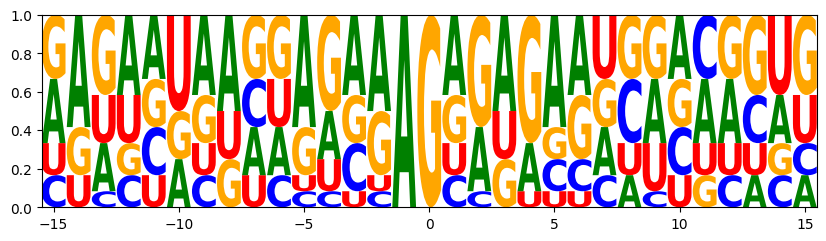

In [ ]:
plt.rcParams['font.family'] = 'sans-serif'
logo = lm.Logo(normalize, font_name = 'sans-serif')

In [ ]:
pup = pd.read_csv('pup2.csv')
max_columns = pup[['countA', 'countT', 'countG', 'countC']].idxmax(axis=1)
column_letters = max_columns.str[-1]
result = ''.join(column_letters)
result

'GTTTGTATTTGAACACTGTGTGTGTCCACTTAAGGGAGAGGGAACCTTGCAGCCAAGAATGACTCTGTGGATAGTGTGTGCCACAACTGTTATTCTTCTCTGTTAAGAAAGAGGGAGAAAGCT'

In [ ]:
substring = 'AAG*G'
start_positions = []

for i in range(len(result) - len(substring) + 1):
    if result[i:i+len(substring)].startswith('AAG') and result[i:i+len(substring)].endswith('G'):
        start_positions.append(i)

if start_positions:
    print("Substring '", substring, "' found at starting positions:", start_positions)
else:
    print("Substring '", substring, "' not found.")

Substring ' AAG*G ' found at starting positions: [31, 108]


In [ ]:
pup.loc[31:35,['pos','countA', 'countT','countG','countC']]

,pos,countA,countT,countG,countC
31,106066972,1.0,0.000000,0.000000,0.000000
32,106066973,1.0,0.000000,0.000000,0.000000
33,106066974,0.0,0.092593,0.907407,0.000000
34,106066975,0.0,0.000000,0.777778,0.222222
35,106066976,0.0,0.000000,1.000000,0.000000


In [ ]:
pup.loc[108:112,['pos','countA', 'countT','countG','countC']]

,pos,countA,countT,countG,countC
108,106067962,1.000000,0.0,0.000000,0.000000
109,106067963,1.000000,0.0,0.000000,0.000000
110,106067964,0.000000,0.0,0.978378,0.021622
111,106067965,1.000000,0.0,0.000000,0.000000
112,106067966,0.010363,0.0,0.989637,0.000000


In [ ]:
target = pup.loc[18:47, ['countA', 'countT', 'countG', 'countC']].rename(columns={'countA': 'A', 'countT': 'U', 'countG': 'G', 'countC': 'C'})
target.insert(0, 'pos', range(-15,15))
target

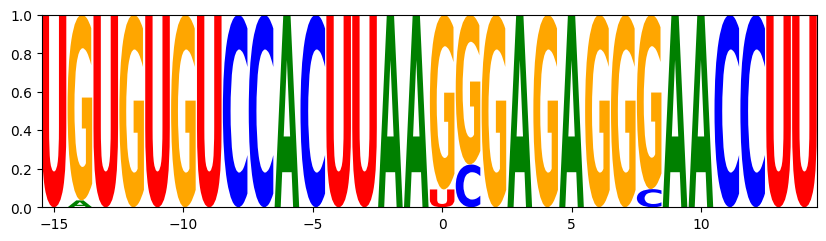

In [ ]:
target = target.set_index('pos')
plt.rcParams['font.family'] = 'sans-serif'
logo = lm.Logo(target, font_name = 'sans-serif')

In [ ]:
with open('G_target_mirlet7g3.fa', 'r') as file:
    sequences = file.readlines()

sequences = [seq.strip() for seq in sequences]

counts = { 'A': [], 'T': [], 'G': [], 'C': [] }

for position in range(0, 30):
    nucleotide_counts = { 'A': 0, 'T': 0, 'G': 0, 'C': 0 }
    for sequence in sequences:
        base = sequence[position]
        nucleotide_counts[base] += 1
    for nucleotide, count in nucleotide_counts.items():
        counts[nucleotide].append(count)
df = pd.DataFrame(counts)
df.rename(columns={'T': 'U'}, inplace=True)
df

In [ ]:
df.insert(0, 'pos', range(-15,15))
df = df.set_index('pos')

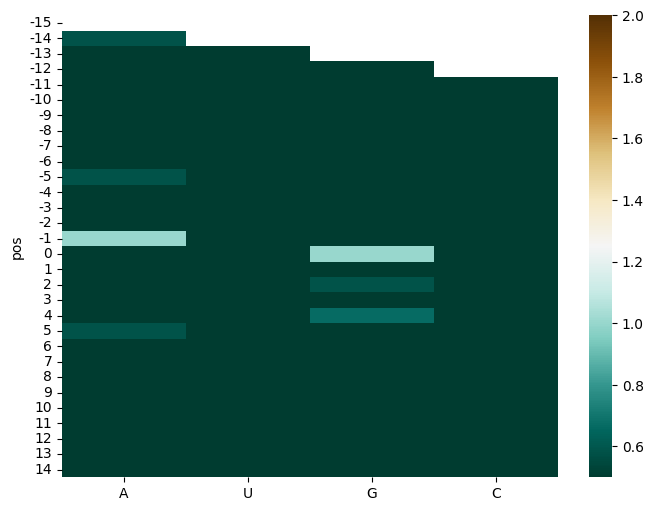

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

relative_frequencies = df.div(df.sum(axis=1), axis=0)

mask = np.triu(np.ones_like(relative_frequencies , dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(relative_frequencies , mask=mask, vmin=0.5, vmax=2, annot=False, cmap="BrBG_r")
plt.show()


https://www.researchgate.net/figure/Computation-of-a-normalised-co-occurrence-matrix-with-d1-and-th0_fig4_310774949  
![Computation-of-a-normalised-co-occurrence-matrix-with-d1-and-th0.png](https://www.researchgate.net/publication/310774949/figure/fig4/AS:431921248378885@1479989458421/Computation-of-a-normalised-co-occurrence-matrix-with-d1-and-th0.png)

ex)  
I like deep learning  
I like NLP  
I enjoy flying  

![adad.png](https://miro.medium.com/v2/resize:fit:640/format:webp/1*gPL6WhSvqc-EOgMjOsHtKQ.png)

In [ ]:
!head G_target_mirlet7g3.fa

CATCTAGATTATCAAGGGAGAGGGAACCTTG
TAGATTATCAAGGGAGAGGGAACCTTGCAGC
GATTATCAAGGGAGAGGGAACCTTGCAGCCA
AGAGGGAACCTTGCAGCCAAGAATGACTCTG
GAACCTTGCAGCCAAGAATGACTCTGTGGAT
ATGACTCTGTGGATAGTGTGTGCCACAAGTG
TAGTGTGTGCCACAAGTGTTATTCTTCTCTG
GTCACAGGGTAATAAGAAAGAGGGAGAAAGC
CAGGGTAATAAGAAAGAGGGAGAAAGCAGAG
GGGTAATAAGAAAGAGGGAGAAAGCAGAGAT


full match : chat-GPT 참조

여기서 나는 modify해서 all identical = 1 이 아니라, 6으로(hexamer이니까)하고,
partial identical = 맞는 서열 개수로 진행.

In [ ]:
### chat GPT 코드 ###
# window_size = 6

# hexamer_set = set()

# # Collect all unique hexamers from the data
# for sequence in data:
#     sequence_length = len(sequence)
#     for i in range(sequence_length - window_size + 1):
#         hexamer = sequence[i:i+window_size]
#         hexamer_set.add(hexamer)

# hexamer_list = sorted(list(hexamer_set))
# cooccurrence_table = [[0] * len(hexamer_list) for _ in range(len(hexamer_list))]

# ### 여기만 수정하면 됨 ##
# # Fill in the co-occurrence table
# for sequence in data:
#     sequence_length = len(sequence)
#     for i in range(sequence_length - window_size + 1):
#         hexamer = sequence[i:i+window_size]
#         row_index = hexamer_list.index(hexamer)
#         col_index = hexamer_list.index(hexamer)
#         cooccurrence_table[row_index][col_index] += 1

# # Print the co-occurrence table
# header = "\t".join(hexamer_list)
# print(f"Hexamer\t{header}")
# for i in range(len(hexamer_list)):
#     row = "\t".join(str(count) for count in cooccurrence_table[i])
#     print(f"{hexamer_list[i]}\t{row}")

In [3]:
data = [
    "CATCTAGATTATCAAGGGAGAGGGAACCTTG",
    "TAGATTATCAAGGGAGAGGGAACCTTGCAGC",
    "GATTATCAAGGGAGAGGGAACCTTGCAGCCA",
    "AGAGGGAACCTTGCAGCCAAGAATGACTCTG",
    "GAACCTTGCAGCCAAGAATGACTCTGTGGAT",
    "ATGACTCTGTGGATAGTGTGTGCCACAAGTG",
    "TAGTGTGTGCCACAAGTGTTATTCTTCTCTG",
    "GTCACAGGGTAATAAGAAAGAGGGAGAAAGC",
    "CAGGGTAATAAGAAAGAGGGAGAAAGCAGAG",
    "GGGTAATAAGAAAGAGGGAGAAAGCAGAGAT"
]

In [4]:
data = [list(sequence) for sequence in data]

1. i 은 df 컬럼 수 , j 는 df row수.
2. df에서, 가능한 6mer를 각각의 row에서 만드니까 i-6+1 개 컬럼 생성.
3. 각 row별로 (i-6+1)*(i-6+1) 테이블 완성
4. 각각의 행열 모두 6mer로 구성, 행과 열이 모두 일치시=6, 1개 다르면=5, ...  모두 다르면=0
5. 위처럼 구한 행렬이 j개 존재
6. j개의 (i-6+1)*(i-6+1) 테이블의 합을 통해 최종 테이블 완성.

In [ ]:
7. 잘못 짠 것 수정! = 행렬일치 여부가 아니라, AT, GC pair 여부로 해야하는구나! 그래야 miRNA특징인 crosslink를 보니까

In [8]:
df = pd.DataFrame(data)

i = df.shape[1]
j = df.shape[0]

six_mers = []
for row in df.values:
    six_mers.append([row[i:i+6] for i in range(i-6+1)])

similarity_matrices = []
for row in six_mers:
    matrix = np.zeros((i-6+1, i-6+1))
    for a in range(i-6+1):
        for b in range(i-6+1):
            score = 0
            for c in range(6):
                if (row[a][c] == 'A' and row[b][c] == 'T') or (row[a][c] == 'G' and row[b][c] == 'C'):
                    score += 1
            matrix[a][b] = score
    similarity_matrices.append(matrix)

final_matrix = np.sum(similarity_matrices, axis=0)

df_final = pd.DataFrame(final_matrix)

In [ ]:
df_final

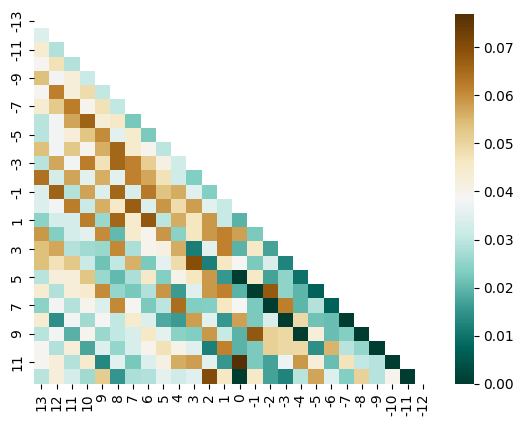

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_final.columns = range(13, -13, -1)
df_final.index = range(-13, 13)

relative_frequencies = df_final.div(df_final.sum(axis=0), axis=1)

mask = np.triu(np.ones_like(relative_frequencies , dtype=bool))
sns.heatmap(relative_frequencies , mask=mask, annot=False, cmap="BrBG_r")
plt.show()

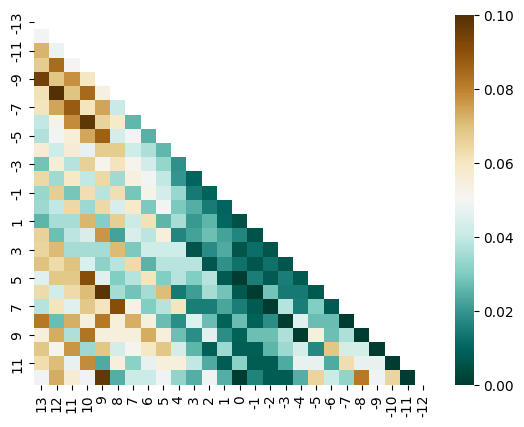

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_final.columns = range(13, -13, -1)
df_final.index = range(-13, 13)

relative_frequencies = df_final.div(df_final.sum(axis=1), axis=0)

mask = np.triu(np.ones_like(relative_frequencies , dtype=bool))
sns.heatmap(relative_frequencies , mask=mask, annot=False, cmap="BrBG_r")
plt.show()

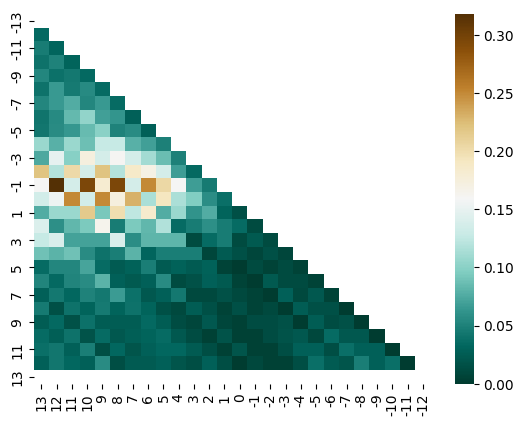

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_final.columns = range(13, -13, -1)
df_final.index = range(-13, 13)

relative_frequencies = df_final.div(df_final.sum(axis=0), axis=0)

mask = np.triu(np.ones_like(relative_frequencies , dtype=bool))
sns.heatmap(relative_frequencies , mask=mask, annot=False, cmap="BrBG_r")
plt.show()

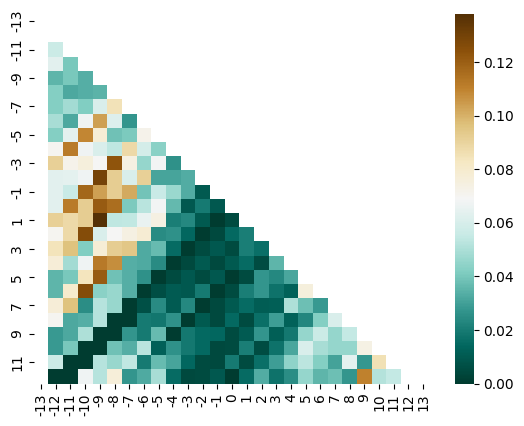

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_final.columns = range(13, -13, -1)
df_final.index = range(-13, 13)

relative_frequencies = df_final.div(df_final.sum(axis=1), axis=1)

mask = np.triu(np.ones_like(relative_frequencies , dtype=bool))
sns.heatmap(relative_frequencies , mask=mask, annot=False, cmap="BrBG_r")
plt.show()